In [0]:
%matplotlib inline

## Importing needed modules


In [2]:
%tensorflow_version 1.x
import numpy as np                   
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils                         

TensorFlow 1.x selected.


Using TensorFlow backend.


## Loading Training Data


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11493376/11490434 [==============================] - 3s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


## Normalization


In [6]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                  
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


## One-hot


In [0]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Initializing model

In [0]:
model = Sequential()

## The first hidden layer

In [0]:
model.add(Dense(512, input_shape=(784,))) 

In [0]:
model.add(Activation('relu'))

In [0]:
model.add(Dropout(0.25))

## Adding the second hidden layer

In [0]:
model.add(Dense(512))
model.add(Activation('relu'))

## The Final Output Layer

In [0]:
model.add(Dense(10))

In [0]:
model.add(Activation('softmax'))

In [140]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_31 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_32 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_33 (Activation)   (None, 10)              

## Compiling

In [0]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Training the model


Epoch 1/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.7687 - accuracy: 0.7997
Epoch 2/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.3579 - accuracy: 0.8965
Epoch 3/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.2959 - accuracy: 0.9149
Epoch 4/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.2557 - accuracy: 0.9273
Epoch 5/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.2274 - accuracy: 0.9349
Epoch 6/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2034 - accuracy: 0.9419
Epoch 7/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.1871 - accuracy: 0.9465
Epoch 8/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1711 - accuracy: 0.9513
Epoch 9/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1578 - accuracy: 0.9550
Epoch 10/100
60000/60000 [====================

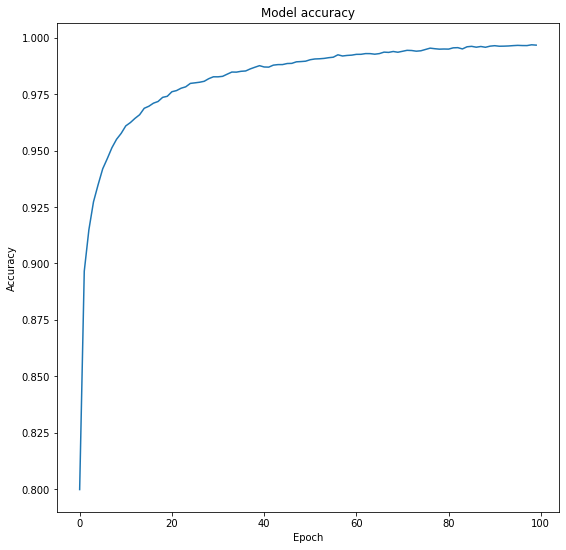

In [142]:
history = model.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          verbose=1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Evaluate Model's Accuracy on Test Data

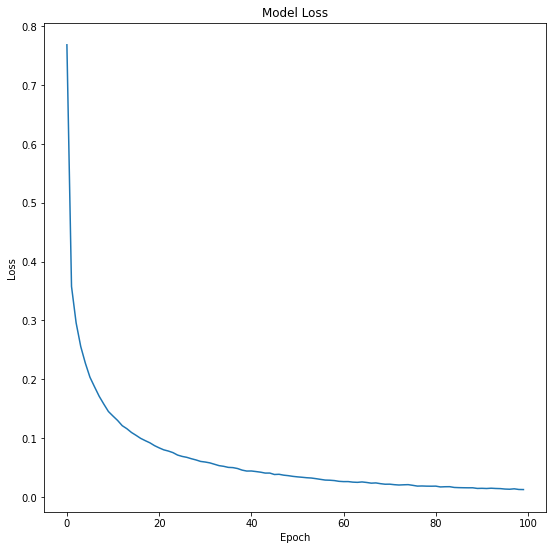

10000/10000 [==============================] - 1s 53us/step
Test loss: 0.055007246428223154
Test accuracy: 0.983299970626831


In [145]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])